<a href="https://colab.research.google.com/github/sitahlango-maker/Financial_Inclusion/blob/main/copy_of_financialinclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# Installing Basic Liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports the pandas library for data handling and analysis.
import pandas as pd

In [114]:
# Loads the Kenya survey data file from the public GitHub repository.
df_ken = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/main/Colab%20Notebooks/FinancialInclution/Findex_Microdata_2025_Kenya.csv')

# Loads the Tanzania survey data file from the public GitHub repository.
df_tza = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/main/Colab%20Notebooks/FinancialInclution/Findex_Microdata_2025_Tanzania.csv')

# Loads the Uganda survey data file from the public GitHub repository.
df_uga = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/main/Colab%20Notebooks/FinancialInclution/Findex_Microdata_2025_Uganda.csv')

In [115]:
# Prints the number of rows and columns for each country’s survey file to confirm successful loading.
print("Kenya shape:", df_ken.shape)
print("Tanzania shape:", df_tza.shape)
print("Uganda shape:", df_uga.shape)

# Shows the first 15 column names of the Kenya file to check the structure.
print("\nKenya columns:", df_ken.columns.tolist()[:15], "...")

Kenya shape: (1000, 183)
Tanzania shape: (1000, 183)
Uganda shape: (1000, 183)

Kenya columns: ['year', 'economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt', 'female', 'age', 'educ', 'inc_q', 'emp_in', 'urbanicity', 'account_fin', 'account_mob'] ...


**Cleaning** **initial** **Findex** **Dataset**

In [116]:
# Defines a function to clean one Findex survey file.
def clean_findex(df, country_code, country_name):

    # Creates a copy of the input DataFrame to avoid changing the original.
    df = df.copy()

    # Adds the full country name as a new column.
    df['country'] = country_name

    # Adds the three-letter country code as a new column.
    df['country_code'] = country_code

    # Checks if the survey weight column exists and converts it to numeric values.
    if 'wgt' in df.columns:
        df['wgt'] = pd.to_numeric(df['wgt'], errors='coerce')

    # Defines the main outcome columns that measure mobile money and digital use.
    target_cols = ['account_mob', 'dig_account', 'anydigpayment']

    # Loops through each outcome column and converts it to numeric values.
    for col in target_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Lists the most important columns to keep in the cleaned file.
    keep = ['country', 'country_code', 'wgt', 'female', 'age', 'educ', 'inc_q',
            'urbanicity', 'account_mob', 'dig_account', 'anydigpayment', 'internet_use']

    # Removes any listed columns that do not exist in the DataFrame.
    keep = [c for c in keep if c in df.columns]

    # Keeps only the selected columns and discards the rest.
    df = df[keep]

    # Returns the cleaned DataFrame.
    return df

# Loads the Kenya survey file directly from the public GitHub repository.
df_ken = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/main/Colab%20Notebooks/FinancialInclution/Findex_Microdata_2025_Kenya.csv')

# Loads the Tanzania survey file directly from the public GitHub repository.
df_tza = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/main/Colab%20Notebooks/FinancialInclution/Findex_Microdata_2025_Tanzania.csv')

# Loads the Uganda survey file directly from the public GitHub repository.
df_uga = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/main/Colab%20Notebooks/FinancialInclution/Findex_Microdata_2025_Uganda.csv')

# Cleans the Kenya data using the function defined earlier.
df_ken_clean = clean_findex(df_ken, 'KEN', 'Kenya')

# Cleans the Tanzania data using the function defined earlier.
df_tza_clean = clean_findex(df_tza, 'TZA', 'Tanzania')

# Cleans the Uganda data using the function defined earlier.
df_uga_clean = clean_findex(df_uga, 'UGA', 'Uganda')

# Combines the three cleaned files into one table (df_micro).
df_micro = pd.concat([df_ken_clean, df_tza_clean, df_uga_clean], ignore_index=True)

# Prints a confirmation message with the shape of the combined table.
print("df_micro defined. Shape:", df_micro.shape)

df_micro defined. Shape: (3000, 12)


In [117]:
# Cleans Kenya survey data using the cleaning function.
df_ken_clean = clean_findex(df_ken, 'KEN', 'Kenya')

# Cleans Tanzania survey data using the cleaning function.
df_tza_clean = clean_findex(df_tza, 'TZA', 'Tanzania')

# Cleans Uganda survey data using the cleaning function.
df_uga_clean = clean_findex(df_uga, 'UGA', 'Uganda')

# Combines three cleaned files into one single table.
df_micro = pd.concat([df_ken_clean, df_tza_clean, df_uga_clean], ignore_index=True)

# Prints total rows and columns of combined table.
print("Combined microdata shape:", df_micro.shape)

# Shows how many rows belong to each country.
print(df_micro['country'].value_counts())

# Prints percentage of missing values in each column (top 12).
print("\nMissing values (%):\n", df_micro.isna().mean().sort_values(ascending=False).head(12))

Combined microdata shape: (3000, 12)
country
Kenya       1000
Tanzania    1000
Uganda      1000
Name: count, dtype: int64

Missing values (%):
 educ            0.0010
country         0.0000
wgt             0.0000
country_code    0.0000
female          0.0000
age             0.0000
inc_q           0.0000
urbanicity      0.0000
account_mob     0.0000
dig_account     0.0000
anydigpayment   0.0000
internet_use    0.0000
dtype: float64


**Loading the country level dataset**

In [118]:
# Loads prevalence index file .
df_preval = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/refs/heads/main/Colab%20Notebooks/FinancialInclution/Mobile%20Money%20Prevalent%20Index-2020-23-Public(MMPI%202020-23).csv')

# Keeps only needed columns and removes rows without valid code.
df_preval = df_preval[['Country', 'ISO3', 'Mobile Money Prevalence (2023)']].dropna(subset=['ISO3'])

# Changes column names to be short and clear.
df_preval.columns = ['country_name', 'country_code', 'mmpi_2023']

# Keeps only Kenya, Tanzania, and Uganda rows.
df_preval = df_preval[df_preval['country_code'].isin(['KEN', 'TZA', 'UGA'])]

In [119]:
# Loads regulatory index file
df_reg = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/main/Colab%20Notebooks/FinancialInclution/Mobile_Money_Regulatory_Index_Database_2025_v2(Data).csv')

# Keeps only rows from year 2025 (latest data).
df_reg = df_reg[df_reg['Year'] == 2025]

# Keeps only selected columns that are most relevant.
df_reg = df_reg[['Country', 'Index', 'Consumer Protection', 'KYC Proportionality',
                 'Entry-level transaction limits', 'Maximum transaction limits', 'Agent Eligibility']]

# Changes column names to be short and clear.
df_reg.columns = ['country_name', 'reg_index', 'reg_cons_prot', 'reg_kyc_prop',
                  'reg_entry_lim', 'reg_max_lim', 'reg_agent_el']

# Adds short country code using country name.
df_reg['country_code'] = df_reg['country_name'].map({'Kenya': 'KEN', 'Tanzania': 'TZA', 'Uganda': 'UGA'})

# Keeps only Kenya, Tanzania, and Uganda rows.
df_reg = df_reg[df_reg['country_code'].isin(['KEN', 'TZA', 'UGA'])]

In [120]:
# Loads deployment tracker file
df_deploy = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/refs/heads/main/Colab%20Notebooks/FinancialInclution/Mobile%20Money%20Deployment.csv')

# Keeps only rows for Kenya, Tanzania, and Uganda.
df_deploy = df_deploy[df_deploy['Country ISO Code'].isin(['KEN', 'TZA', 'UGA'])]

# Counts number of mobile money providers per country.
df_providers = df_deploy.groupby('Country ISO Code').size().reset_index(name='num_providers')

# Changes country code column name to match others.
df_providers = df_providers.rename(columns={'Country ISO Code': 'country_code'})

# Changes launch year to numbers (ignores errors).
df_deploy['launch_year'] = pd.to_numeric(df_deploy['Launch Year'], errors='coerce')

# Finds earliest launch year per country.
df_oldest = df_deploy.groupby('Country ISO Code')['launch_year'].min().reset_index(name='earliest_launch_year')

# Changes country code column name to match others.
df_oldest = df_oldest.rename(columns={'Country ISO Code': 'country_code'})

**Building Country Facts Table**

In [121]:
# Starts country facts table with prevalence category.
df_country_facts = df_preval[['country_code', 'mmpi_2023']].copy()

# Adds regulatory scores using left join.
df_country_facts = df_country_facts.merge(
    df_reg[['country_code', 'reg_index', 'reg_cons_prot', 'reg_kyc_prop',
            'reg_entry_lim', 'reg_max_lim', 'reg_agent_el']],
    on='country_code',
    how='left'
)

# Combines provider count and earliest launch year.
df_deploy_info = df_providers.merge(df_oldest, on='country_code', how='left')

# Adds provider information to country facts table.
df_country_facts = df_country_facts.merge(df_deploy_info, on='country_code', how='left')

# Prints the final country facts table.
print(df_country_facts)

  country_code  mmpi_2023  reg_index  reg_cons_prot  reg_kyc_prop  \
0          KEN  Very high    88.0000       100.0000             0   
1          TZA  Very high    87.1600        83.3300           100   
2          UGA  Very high    88.3300       100.0000           100   

   reg_entry_lim  reg_max_lim  reg_agent_el  num_providers  \
0            100          100           100              4   
1            100          100           100              6   
2            100          100           100              7   

   earliest_launch_year  
0                  2007  
1                  2008  
2                  2009  


**Selecting Survey Columns and Final Combination**

In [122]:
# Lists most useful columns from survey data.
keep_survey = [
    'country_code', 'female', 'age', 'educ', 'inc_q', 'urbanicity',
    'account_mob', 'dig_account', 'anydigpayment', 'internet_use', 'wgt'
]

# Keeps only selected columns from combined survey data.
df_survey_clean = df_micro[keep_survey].copy()

# Joins survey data with country facts using country code.
df_final = df_survey_clean.merge(df_country_facts, on='country_code', how='left')

# Prints final table size to confirm.
print("Final combined dataset shape:", df_final.shape)

# Prints first few rows of final table.
print("First few rows:\n", df_final.head())

# Prints percentage of missing values in each column.
print("\nMissing values (%):\n", df_final.isna().mean().sort_values(ascending=False).head(10))

Final combined dataset shape: (3000, 20)
First few rows:
   country_code  female  age   educ  inc_q  urbanicity  account_mob  \
0          KEN       1   25 2.0000      1           1            1   
1          KEN       1   26 2.0000      4           1            1   
2          KEN       1   21 2.0000      3           1            1   
3          KEN       1   25 2.0000      5           1            1   
4          KEN       2   31 3.0000      5           2            1   

   dig_account  anydigpayment  internet_use    wgt  mmpi_2023  reg_index  \
0            1              1             1 0.7233  Very high    88.0000   
1            1              1             1 0.3314  Very high    88.0000   
2            1              1             1 1.0713  Very high    88.0000   
3            1              1             1 0.6770  Very high    88.0000   
4            1              1             1 0.4577  Very high    88.0000   

   reg_cons_prot  reg_kyc_prop  reg_entry_lim  reg_max_lim  reg_

**Saving the Final Dataset as CSV**

In [123]:
# 1. Save the dataset as CSV in Colab's temporary storage
df_final.to_csv('FinalCombine.csv', index=False)

# 2. Install git if not already available (usually pre-installed in Colab)
!apt-get update -qq && apt-get install -y git

# 3. Configure git with your details (replace with your own email and username)
!git config --global user.email "your-email@example.com"
!git config --global user.name "Your GitHub Username"

# 4. Clone your repository (replace with your actual repo URL)
!git clone https://github.com/sitahlango-maker/Financial_Inclusion.git
%cd Financial_Inclusion

# 5. Move the CSV file to the desired folder inside the repo
!mkdir -p "Colab Notebooks/FinancialInclution"
!mv ../FinalCombine.csv "Colab Notebooks/FinancialInclution/FinalCombine.csv"

# 6. Add, commit, and push the file to GitHub
!git add "Colab Notebooks/FinancialInclution/FinalCombine.csv"
!git commit -m "Add FinalCombine.csv - combined Findex and country-level dataset"
!git push origin main

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 82 not upgraded.
Cloning into 'Financial_Inclusion'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 72 (delta 27), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (72/72), 486.77 KiB | 3.74 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/Financial_Inclusion/Financial_Inclusion
[main c107ce4] Add FinalCombine.csv - combined Findex and country-level dataset
 1 file changed, 0 insertions(+), 0 deletions(-)
 rewrite Colab Notebooks/FinancialInclution/FinalCombine.csv (97%)
f

In [124]:
# Load the Mobile Money Deployment Tracker
df_preval = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/refs/heads/main/Colab%20Notebooks/FinancialInclution/Mobile%20Money%20Prevalent%20Index-2020-23-Public(MMPI%202020-23).csv',
 )

# Rename column for merging
df_preval = df_preval[['Country', 'ISO3', 'Mobile Money Prevalence (2023)']]

#--Remove rows without valid country code
df_preval = df_preval.dropna(subset=['ISO3'])

#--Select the columns to be used:
df_preval = df_preval[['Country', 'ISO3', 'Mobile Money Prevalence (2023)']]

#--Make the column names short and clear
df_preval.columns = ['country_name', 'country_code', 'mmpi_2023']


#--Keep only three countries (Kenya, Uganda and Tanzania)
df_preval = df_preval[df_preval['country_code'].isin(['KEN', 'TZA', 'UGA'])]

df_preval.columns.tolist()

['country_name', 'country_code', 'mmpi_2023']

**Combining the four latter GSMA datasets With the Original Findex Dataset**

In [125]:
df_country_facts = df_preval[['country_code', 'mmpi_2023']].copy()
df_country_facts = df_country_facts.merge(df_reg[['country_code', 'reg_index', 'reg_cons_prot', 'reg_kyc_prop',
                                                  'reg_entry_lim', 'reg_max_lim', 'reg_agent_el']],
                                          on='country_code', how='left')
df_deploy_info = df_providers.merge(df_oldest, on='country_code', how='left')
df_country_facts = df_country_facts.merge(df_deploy_info, on='country_code', how='left')

In [126]:
# Preparing microdata (the three Findex survey files already combined in df_micro)
# Adding country_code (just in case it's not updated properly)
df_micro['country_code'] = df_micro['country'].map({
    'Kenya': 'KEN',
    'Tanzania': 'TZA',
    'Uganda': 'UGA'
})

In [127]:
# Keep only the most useful survey columns
keep_survey = [
    'country_code', 'female', 'age', 'educ', 'inc_q', 'urbanicity',
    'account_mob', 'dig_account', 'anydigpayment', 'internet_use', 'wgt'
]
df_survey_clean = df_micro[keep_survey].copy()

In [128]:
# Building one small country facts table from the other five sources
# Starting with prevalence dataset as base
df_country_facts = df_preval[['country_code', 'mmpi_2023']].copy()

In [129]:
# Adding regulatory scores
df_country_facts = df_country_facts.merge(
    df_reg[['country_code', 'reg_index', 'reg_cons_prot', 'reg_kyc_prop',
            'reg_entry_lim', 'reg_max_lim', 'reg_agent_el']],
    on='country_code',
    how='left'
)

In [130]:
# Adding the number of providers and earliest launch year
df_providers = df_deploy.groupby('Country ISO Code').size().reset_index(name='num_providers')
df_earliest = df_deploy.groupby('Country ISO Code')['launch_year'].min().reset_index(name='earliest_launch')
df_providers = df_providers.rename(columns={'Country ISO Code': 'country_code'})
df_earliest  = df_earliest.rename(columns={'Country ISO Code': 'country_code'})

df_deploy_info = df_providers.merge(df_earliest, on='country_code', how='left')
df_country_facts = df_country_facts.merge(df_deploy_info, on='country_code', how='left')

In [131]:
# Joining the country facts to every row of the survey data
df_final = df_survey_clean.merge(
    df_country_facts,
    on='country_code',
    how='left'
)

In [132]:
# Checking the result
print("Final combined dataset shape:", df_final.shape)
print("First few rows:\n", df_final.head())
print("\nMissing values (%):\n", df_final.isna().mean().sort_values(ascending=False).head(10))

Final combined dataset shape: (3000, 20)
First few rows:
   country_code  female  age   educ  inc_q  urbanicity  account_mob  \
0          KEN       1   25 2.0000      1           1            1   
1          KEN       1   26 2.0000      4           1            1   
2          KEN       1   21 2.0000      3           1            1   
3          KEN       1   25 2.0000      5           1            1   
4          KEN       2   31 3.0000      5           2            1   

   dig_account  anydigpayment  internet_use    wgt  mmpi_2023  reg_index  \
0            1              1             1 0.7233  Very high    88.0000   
1            1              1             1 0.3314  Very high    88.0000   
2            1              1             1 1.0713  Very high    88.0000   
3            1              1             1 0.6770  Very high    88.0000   
4            1              1             1 0.4577  Very high    88.0000   

   reg_cons_prot  reg_kyc_prop  reg_entry_lim  reg_max_lim  reg_

In [133]:
# Saving the final file
df_final.to_csv(
    'https://github.com/sitahlango-maker/Financial_Inclusion/tree/main/Colab%20Notebooks/FinancialInclution',
    index=False
)

In [134]:
# Import libraries needed for data preparation and modelling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [135]:
# Set display options for better readability
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', '{:.4f}'.format)

In [136]:
# Load the combined dataset saved earlier
df = pd.read_csv('https://raw.githubusercontent.com/sitahlango-maker/Financial_Inclusion/refs/heads/main/Colab%20Notebooks/FinancialInclution/final_combined_data.csv')

In [137]:
# Display basic information about the loaded data
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nMissing values (%):")
print(df.isna().mean().sort_values(ascending=False).head(10))


Dataset shape: (3000, 20)

First few rows:
  country_code  female  age   educ  inc_q  urbanicity  account_mob  \
0          KEN       1   25 2.0000      1           1            1   
1          KEN       1   26 2.0000      4           1            1   
2          KEN       1   21 2.0000      3           1            1   
3          KEN       1   25 2.0000      5           1            1   
4          KEN       2   31 3.0000      5           2            1   

   dig_account  anydigpayment  internet_use    wgt  mmpi_2023  reg_index  \
0            1              1             1 0.7233  Very high    88.0000   
1            1              1             1 0.3314  Very high    88.0000   
2            1              1             1 1.0713  Very high    88.0000   
3            1              1             1 0.6770  Very high    88.0000   
4            1              1             1 0.4577  Very high    88.0000   

   reg_cons_prot  reg_kyc_prop  reg_entry_lim  reg_max_lim  reg_agent_el  \
0  

In [138]:
# Imports pandas for loading and managing data tables.
import pandas as pd

# Imports numpy for numerical calculations and array handling.
import numpy as np

# Imports matplotlib and seaborn for creating plots and visual checks.
import matplotlib.pyplot as plt
import seaborn as sns

# Imports tools from scikit-learn for splitting data and building models.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [139]:

# Prints the shape (rows and columns) of the loaded data to confirm it is correct.
print("Dataset shape:", df.shape)


Dataset shape: (3000, 20)


In [140]:

# Prints all column names to see what features are available.
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['country_code', 'female', 'age', 'educ', 'inc_q', 'urbanicity', 'account_mob', 'dig_account', 'anydigpayment', 'internet_use', 'wgt', 'mmpi_2023', 'reg_index', 'reg_cons_prot', 'reg_kyc_prop', 'reg_entry_lim', 'reg_max_lim', 'reg_agent_el', 'num_providers', 'earliest_launch']


In [141]:
# Prints the percentage of missing values in each column (sorted highest to lowest).
print("\nMissing values (%):")
print(df.isna().mean().sort_values(ascending=False).head(15))


Missing values (%):
educ            0.0010
country_code    0.0000
female          0.0000
age             0.0000
inc_q           0.0000
urbanicity      0.0000
account_mob     0.0000
dig_account     0.0000
anydigpayment   0.0000
internet_use    0.0000
wgt             0.0000
mmpi_2023       0.0000
reg_index       0.0000
reg_cons_prot   0.0000
reg_kyc_prop    0.0000
dtype: float64


In [142]:
# Prints the data types of each column to check they are correct.
print("\nData types:")
print(df.dtypes)


Data types:
country_code        object
female               int64
age                  int64
educ               float64
inc_q                int64
urbanicity           int64
account_mob          int64
dig_account          int64
anydigpayment        int64
internet_use         int64
wgt                float64
mmpi_2023           object
reg_index          float64
reg_cons_prot      float64
reg_kyc_prop         int64
reg_entry_lim        int64
reg_max_lim          int64
reg_agent_el         int64
num_providers        int64
earliest_launch      int64
dtype: object


**Splitting the dataset**

In [143]:
# Imports the function needed to split the data.
from sklearn.model_selection import train_test_split

In [144]:

# Defines the features (inputs) by removing the target column.
# All columns except 'account_mob' are used as inputs.
X = df.drop('account_mob', axis=1)

In [145]:

# Defines the target (output): whether a person has a mobile money account.
y = df['account_mob']

In [146]:
# Splits the data into training and test sets.
# 80% for training, 20% for testing.
# random_state=42 makes the split the same every time the code runs.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keeps the same proportion of account holders in both sets.
)

In [147]:
# Prints the size of each set to confirm the split.
print("Training set shape (features):", X_train.shape)
print("Training set shape (target):", y_train.shape)
print("Test set shape (features):", X_test.shape)
print("Test set shape (target):", y_test.shape)

Training set shape (features): (2400, 19)
Training set shape (target): (2400,)
Test set shape (features): (600, 19)
Test set shape (target): (600,)


In [148]:
# Prints the percentage of people with mobile money accounts in each set.
print("\nPercentage with account in training set:", y_train.mean() * 100, "%")
print("Percentage with account in test set:", y_test.mean() * 100, "%")


Percentage with account in training set: 74.125 %
Percentage with account in test set: 74.16666666666667 %


**Train and evaluate the single (Monolithic) Model**

In [149]:
# Imports the random forest classifier from scikit-learn.
from sklearn.ensemble import RandomForestClassifier
# Imports functions to measure model performance.
from sklearn.metrics import accuracy_score, classification_report

*Before training the model, we convert all categorical (text) columns to numbers using one-hot encoding or label encoding.*

In [150]:
# Identify categorical (text) columns in the feature set
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns to encode:", categorical_cols)

# Apply one-hot encoding to convert categories to numbers
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=categorical_cols, drop_first=True)

# Make sure train and test have the same columns (add missing ones with 0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("After encoding - Training shape:", X_train.shape)
print("After encoding - Test shape:", X_test.shape)

Categorical columns to encode: ['country_code', 'mmpi_2023']
After encoding - Training shape: (2400, 19)
After encoding - Test shape: (600, 19)


In [151]:
model_single = RandomForestClassifier(n_estimators=100, random_state=42)
model_single.fit(X_train, y_train)

y_pred_single = model_single.predict(X_test)

accuracy_single = accuracy_score(y_test, y_pred_single)
print("Single Model Accuracy:", accuracy_single)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_single))

Single Model Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       155
           1       0.97      1.00      0.99       445

    accuracy                           0.98       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.98      0.98      0.98       600



**Define experts for each country and train them**

In [152]:
# Features (all columns except the target)
X = df.drop('account_mob', axis=1)

In [153]:
# Split into training (80%) and test (20%) sets
# stratify=y keeps the same proportion of account holders in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [154]:
# Target variable
y = df['account_mob']

In [155]:
# Print confirmation
print("Training set shape (X):", X_train.shape)
print("Test set shape (X):", X_test.shape)
print("Training set shape (y):", y_train.shape)
print("Test set shape (y):", y_test.shape)

Training set shape (X): (2400, 19)
Test set shape (X): (600, 19)
Training set shape (y): (2400,)
Test set shape (y): (600,)


In [161]:
# Print all column names in the test set features (X_test)
print("Columns available in X_test (test features):")
print(X_test.columns.tolist())

Columns available in X_test (test features):
['female', 'age', 'educ', 'inc_q', 'urbanicity', 'dig_account', 'anydigpayment', 'internet_use', 'wgt', 'mmpi_2023', 'reg_index', 'reg_cons_prot', 'reg_kyc_prop', 'reg_entry_lim', 'reg_max_lim', 'reg_agent_el', 'num_providers', 'earliest_launch']


In [162]:
# Print the number of columns and rows in X_test
print("\nTest features shape:", X_test.shape)


Test features shape: (600, 18)


In [163]:
# Print the first 5 rows of X_test to see example values
print("\nFirst 5 rows of X_test:")
print(X_test.head())


First 5 rows of X_test:
      female  age   educ  inc_q  urbanicity  dig_account  anydigpayment  \
384        1   24 2.0000      3           1            1              1   
1956       2   26 1.0000      2           1            0              0   
2213       1   80 1.0000      1           1            0              0   
723        1   26 2.0000      3           1            1              1   
721        2   54 2.0000      3           1            1              1   

      internet_use    wgt  mmpi_2023  reg_index  reg_cons_prot  reg_kyc_prop  \
384              0 1.1672  Very high    88.0000       100.0000             0   
1956             0 1.7826  Very high    87.1600        83.3300           100   
2213             0 0.4341  Very high    88.3300       100.0000           100   
723              1 1.7313  Very high    88.0000       100.0000             0   
721              0 0.6663  Very high    88.0000       100.0000             0   

      reg_entry_lim  reg_max_lim  reg_agent

In [164]:
# Print column names in the test target (y_test) for confirmation
print("\nTarget column in y_test:", y_test.name)
print("Example target values (first 5):")
print(y_test.head())


Target column in y_test: account_mob
Example target values (first 5):
384     1
1956    0
2213    0
723     1
721     1
Name: account_mob, dtype: int64


***Expert training***

In [166]:
# Identify any remaining categorical (text) columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns that need encoding:", categorical_cols)

# Convert them to numbers using one-hot encoding
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=categorical_cols, drop_first=True)

# Test set has exactly the same columns as training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("After encoding:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Categorical columns that need encoding: ['mmpi_2023']
After encoding:
X_train shape: (2400, 17)
X_test shape: (600, 17)


In [168]:
experts = {}

for country in ['KEN', 'TZA', 'UGA']:
    mask_train = country_codes_train == country
    X_train_country = X_train[mask_train]
    y_train_country = y_train[mask_train]

    if len(X_train_country) == 0:
        print(f"No training data for {country}")
        continue

    expert = RandomForestClassifier(n_estimators=100, random_state=42)
    expert.fit(X_train_country, y_train_country)
    experts[country] = expert

print("Trained experts for:", list(experts.keys()))

Trained experts for: ['KEN', 'TZA', 'UGA']


**Creating plots to confirm accuracy through visual output**

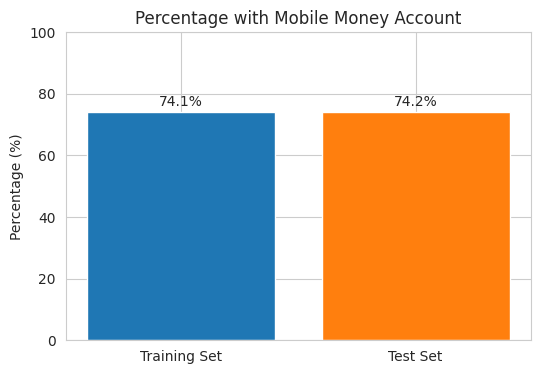

In [169]:
# Import the plotting libraries if not already loaded
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style for all plots
sns.set_style("whitegrid")

# Plot 1: Percentage with mobile money account (account_mob = 1) in train and test
plt.figure(figsize=(6, 4))
train_pct = y_train.mean() * 100
test_pct  = y_test.mean() * 100

plt.bar(['Training Set', 'Test Set'], [train_pct, test_pct], color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage with Mobile Money Account')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
for i, v in enumerate([train_pct, test_pct]):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center')
plt.show()

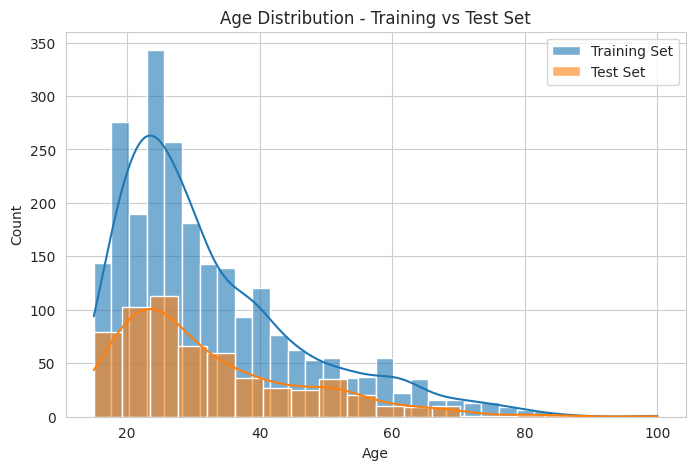

In [170]:
# Plot 2: Age distribution in training and test sets
plt.figure(figsize=(8, 5))
sns.histplot(data=X_train, x='age', color='#1f77b4', label='Training Set', alpha=0.6, kde=True)
sns.histplot(data=X_test, x='age', color='#ff7f0e', label='Test Set', alpha=0.6, kde=True)
plt.title('Age Distribution - Training vs Test Set')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

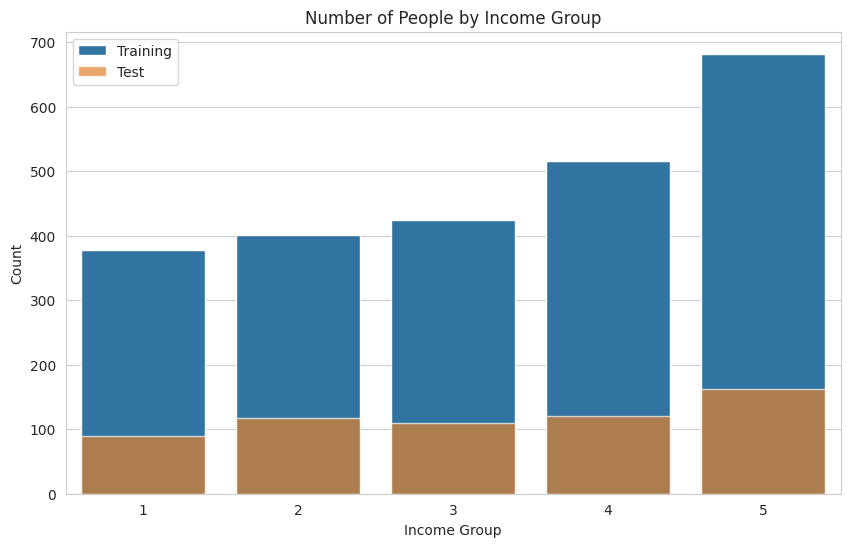

In [171]:
# Plot 3: Count of people by income group in training and test sets
plt.figure(figsize=(10, 6))
sns.countplot(data=X_train.assign(Set='Training'), x='inc_q', color='#1f77b4', label='Training')
sns.countplot(data=X_test.assign(Set='Test'), x='inc_q', color='#ff7f0e', label='Test', alpha=0.7)
plt.title('Number of People by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend()
plt.show()

/tmp/ipython-input-1486301848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=account_by_country.index, y=account_by_country.values, palette='viridis')


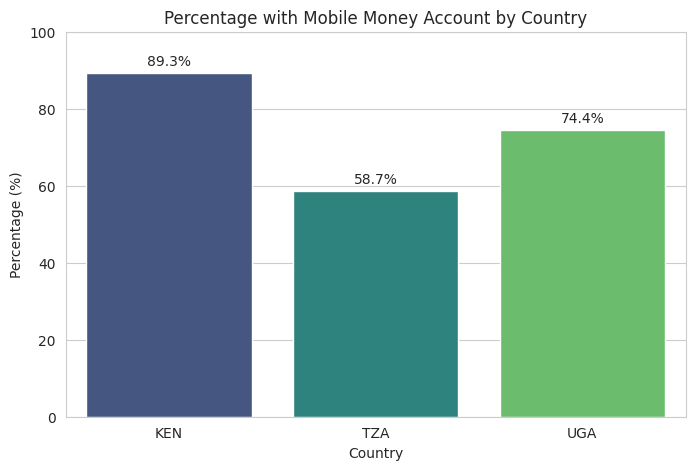

In [172]:
# Plot 4: Percentage with mobile money account by country
plt.figure(figsize=(8, 5))
account_by_country = df_final.groupby('country_code')['account_mob'].mean() * 100
sns.barplot(x=account_by_country.index, y=account_by_country.values, palette='viridis')
plt.title('Percentage with Mobile Money Account by Country')
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
for i, v in enumerate(account_by_country.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center')
plt.show()

/tmp/ipython-input-2742794033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_by_country.index, y=age_by_country.values, palette='magma')


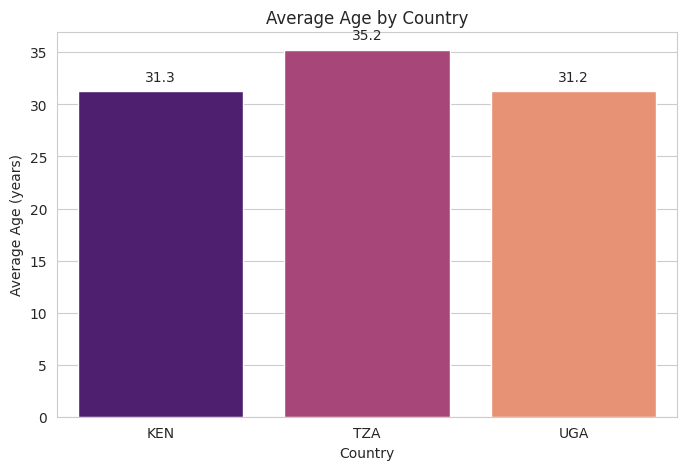

In [173]:
# Plot 5: Average age by country
plt.figure(figsize=(8, 5))
age_by_country = df_final.groupby('country_code')['age'].mean()
sns.barplot(x=age_by_country.index, y=age_by_country.values, palette='magma')
plt.title('Average Age by Country')
plt.xlabel('Country')
plt.ylabel('Average Age (years)')
for i, v in enumerate(age_by_country.values):
    plt.text(i, v + 1, f"{v:.1f}", ha='center')
plt.show()